# Dynamics on networks

## Notes from the readings:
<code>Source: Sayama, H. (2015). Introduction to the modeling and analysis of complex systems. Open SUNY Textbooks, Milne Library. Genesco, NY.</code>

1. **Models for “dynamics on networks”** These models are the most natural extension of traditional dynamical systems models. They consider how the states of components, or nodes, change over time through their interactions with other nodes that are connected to them
2. **Models for “dynamics of networks”** These are the models that consider dynamical changes of network topology itself over time, for various purposes: to understand mechanisms that bring particular network topologies, to evaluate robustness and vulnerability of networks, to design procedures for improving certain properties of networks, etc

In [161]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns

# matplotlib.use('TkAgg')
# from pylab import *
# import pycxsimulator

In [279]:
def simulation(update_func, output):
    # SIMUATION FOR 1000 NETWORK
    for _ in range(10**3):
        initialize()
        timestep, counter = 0.5, 0
        while timestep not in [0.0, 1.0]:
            timestep = update_func()
            counter+=1
        output.append(counter)
    
    # PLOTTING THE RESULTS OF THE SIMULATION
    sns.set()
    plt.figure(figsize=(12, 8))
    plt.hist(output, alpha=0.5, density=True)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(0.01))
    plt.axvline(np.mean(output), 
                color='red', linewidth=0.8, linestyle='--')
    plt.title("""Distribution of time steps needed for consensus formation
              \nMean: {}""".format(np.mean(output)), fontsize=16)
    plt.xlabel("Time Steps")
    plt.ylabel("Density")
    plt.show()

## Majority rule network

In [280]:
# CODE 16.4

def initialize():
    global g, nextg
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0
    nextg = g.copy()
    nextg.pos = g.pos

def observe():
    global g, nextg
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    plt.show()
    
def update_majority():
    global g, nextg
    for i in g.nodes:
        count = g.nodes[i]['state']
        for j in g.neighbors(i):
            count += g.nodes[j]['state']
        ratio = count / (g.degree[i] + 1.0)
        nextg.nodes[i]['state'] = 1 if ratio > .5 \
                                  else 0 if ratio < .5 \
                                  else 1 if rd.random() < .5 else 0
    g, nextg = nextg, g
        
#pycxsimulator.GUI().start(func=[initialize, observe, update])

The majority network after 0  time steps



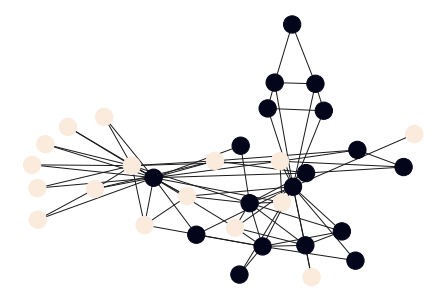

The majority network after 2  time steps



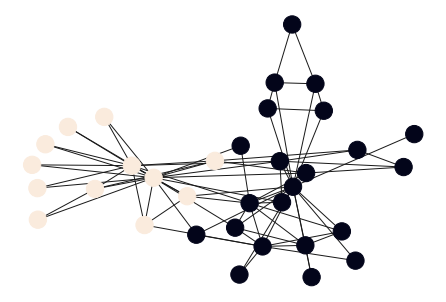

The majority network after 4  time steps



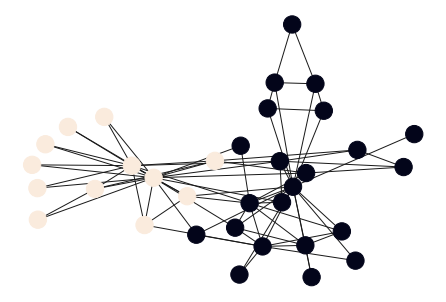

The majority network after 6  time steps



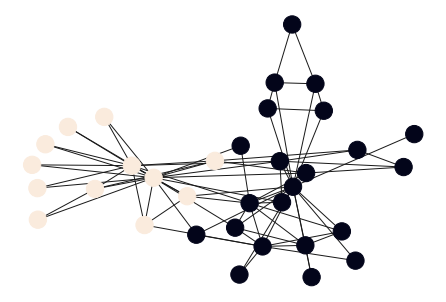

The majority network after 8  time steps



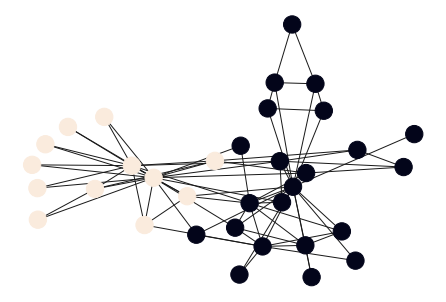

The majority network after 10  time steps



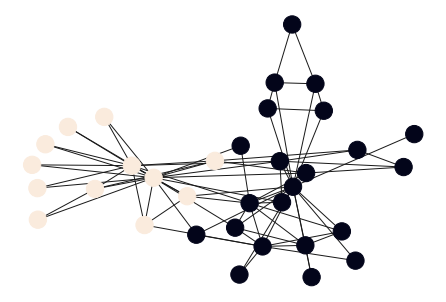

In [286]:
initialize()
for i in range(0, 11):
    update_majority()
    if i%2 == 0:
        print("The majority network after",i," time steps\n")
        observe()

## Voter model network

In [95]:
import random as rd

def initialize():
    global g, density
    density = []
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

def observe():
    global g
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    plt.show()

def update():
    global g, density
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    density.append(sum([g.nodes[i]['state'] for i in g.nodes])/len(g.nodes))
    return density[-1]

#pycxsimulator.GUI().start(func=[initialize, observe, update])

The voter network after 0  time steps



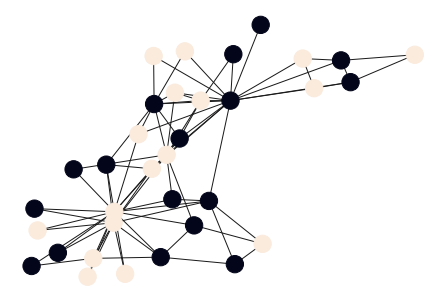

The voter network after 100  time steps



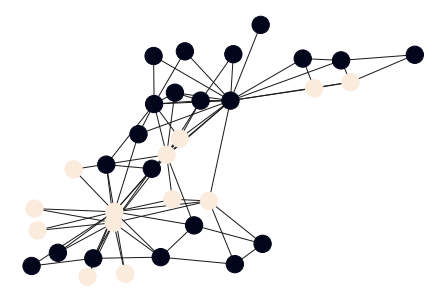

The voter network after 200  time steps



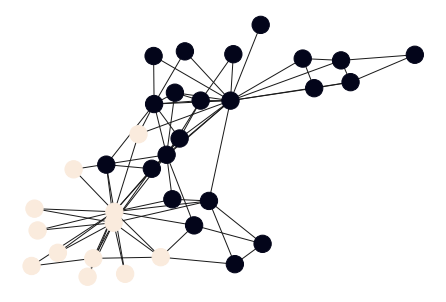

The voter network after 300  time steps



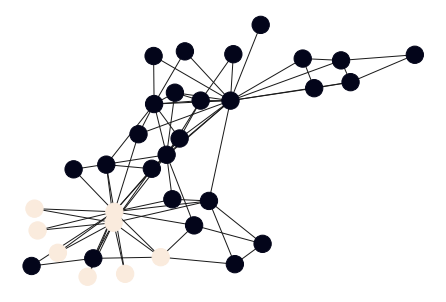

The voter network after 400  time steps



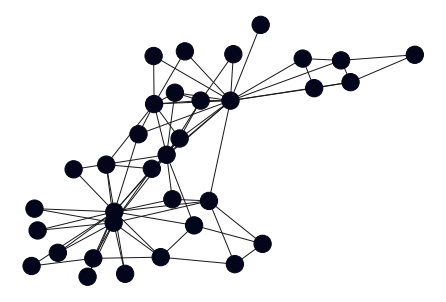

The voter network after 500  time steps



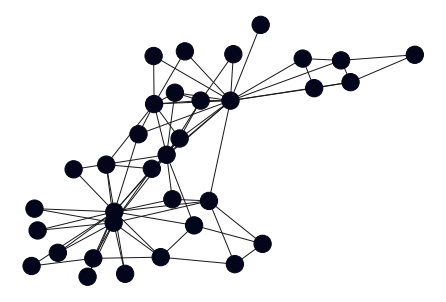

In [142]:
initialize()
for i in range(0, 501):
    update()
    if i%100 == 0:
        print("The voter network after",i," time steps\n")
        observe()

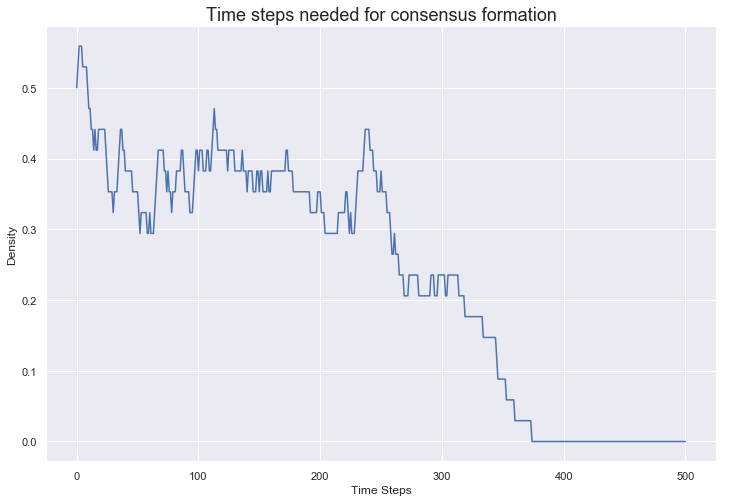

In [146]:
sns.set()
plt.figure(figsize=(12, 8))
plt.plot(density)
plt.title("Time steps needed for consensus formation", fontsize=18)
plt.xlabel("Time Steps")
plt.ylabel("Density")
plt.show()

**Sayama Exercise 16.2.**

Revise the code above so that you can measure how many steps it will take until the system reaches a consensus (i.e., homogenized state). Then run multiple simulations (Monte Carlo simulations) to calculate the average time length needed for consensus formation in the original voter model.

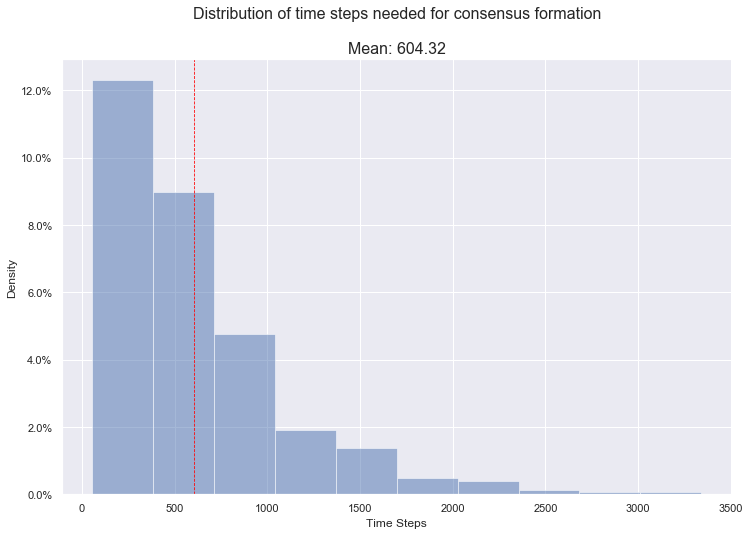

In [197]:
consensus_original = []
simulation(update, consensus_original)

**Sayama Exercise 16.3.**

Revise the code further to implement (1) the reversed and (2) the edge-based voter models. Then conduct Monte Carlo simulations to measure the average time length needed for consensus formation in each case. Compare the results between the three versions

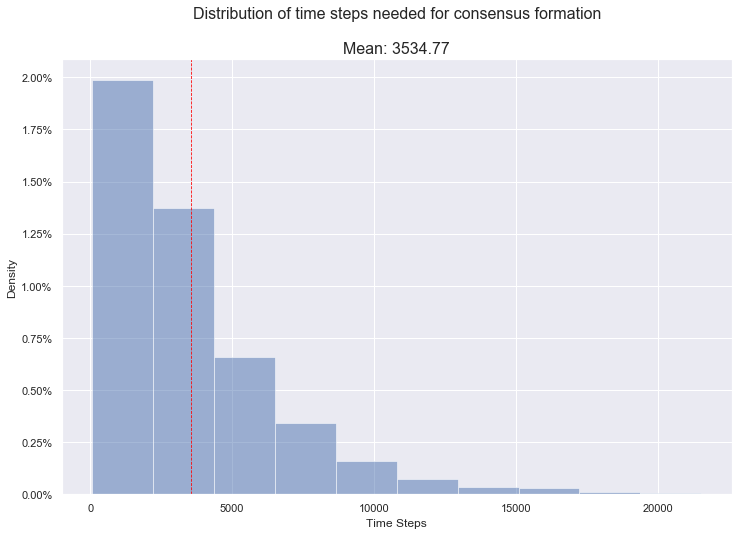

In [198]:
def update_reversed():
    global g, density
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    density.append(sum([g.nodes[i]['state'] for i in g.nodes])/len(g.nodes))
    return density[-1]

consensus_reversed = []
simulation(update_reversed, consensus_reversed)

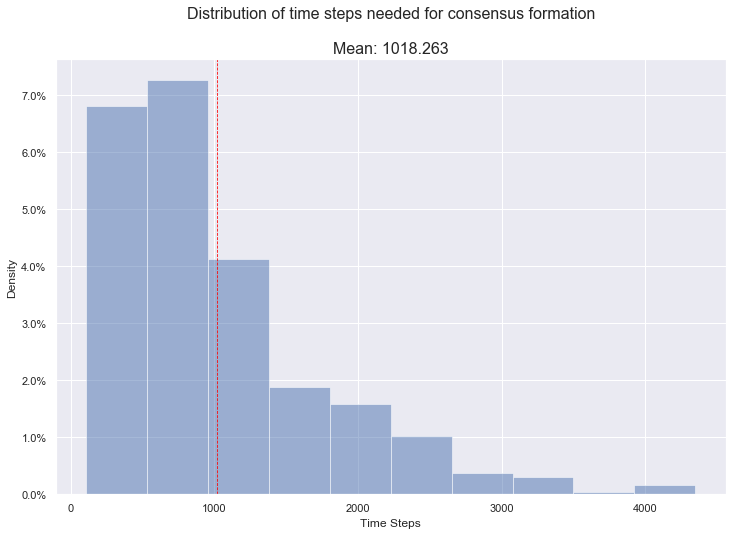

In [199]:
def update_edge_based():
    global g, density
    couple = rd.choice(list(g.edges))
    if rd.random() > .5: speaker, listener = couple[0], couple[1]
    else: listener, speaker = couple[0], couple[1]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    density.append(sum([g.nodes[i]['state'] for i in g.nodes])/len(g.nodes))
    return density[-1]

consensus_edge_based = []
simulation(update_edge_based, consensus_edge_based)